In [65]:
from utils.analyze import load_data, detrend2D, wiener, sensor_function, sample_shape, sgolay2d, interpolate_background
from utils.plot import plot, ProfileBuilder, plot_profile, cat1d
import matplotlib.pyplot as plt
import numpy as np
import datetime
from scipy.ndimage.interpolation import rotate
from scipy.ndimage.filters import gaussian_filter
from scipy.interpolate import interpn
from skimage.restoration import richardson_lucy as de
%matplotlib notebook

In [66]:
x, y, z, T, t, settings = load_data("edge_kleber_wasser", range(11,19))
x = x[0]
y = y[0]
settings = settings[0]
print("Loaded {} data sets.\n\nSettings:".format(len(z)))
settings

Loaded 8 data sets.

Settings:


{'change_direction': False,
 'data_logger_channel': 101,
 'data_points': 169,
 'direction': ('x', 'y'),
 'extent': ((9.0, 26, 0.1), (13, 30, 0.1)),
 'mode': 'absolute',
 'sampling_time': 0.256,
 'sensors': ['1161']}

In [67]:
x_bg, y_bg, z_bg, T_bg, t_bg, settings_bg = load_data("background_full_0.1", [4])
x_bg = x_bg[0]
y_bg = y_bg[0]
background = interpolate_background(x_bg, y_bg, z_bg[0][0], x, y)
background = background.max() - background
settings_bg = settings_bg[0]

<IPython.core.display.Javascript object>


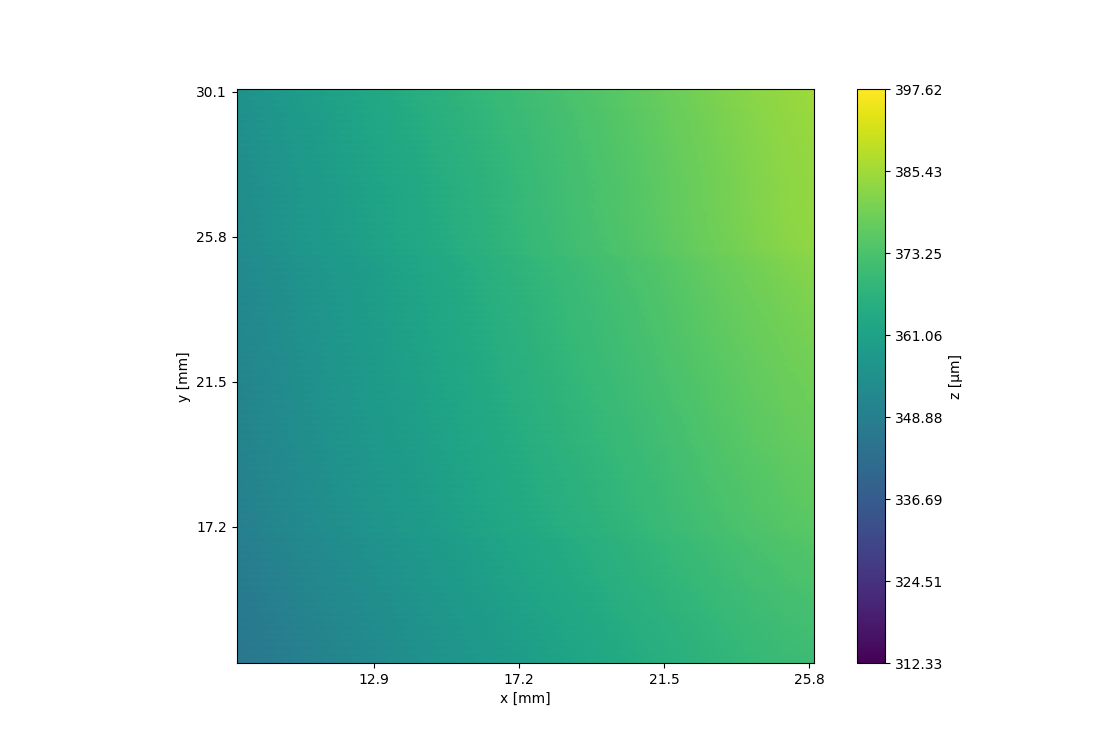

(<matplotlib.figure.Figure at 0x7f43e19db048>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f43e1991dd8>)

In [73]:
plot(x_bg, y_bg, z_bg[0][0])

<IPython.core.display.Javascript object>


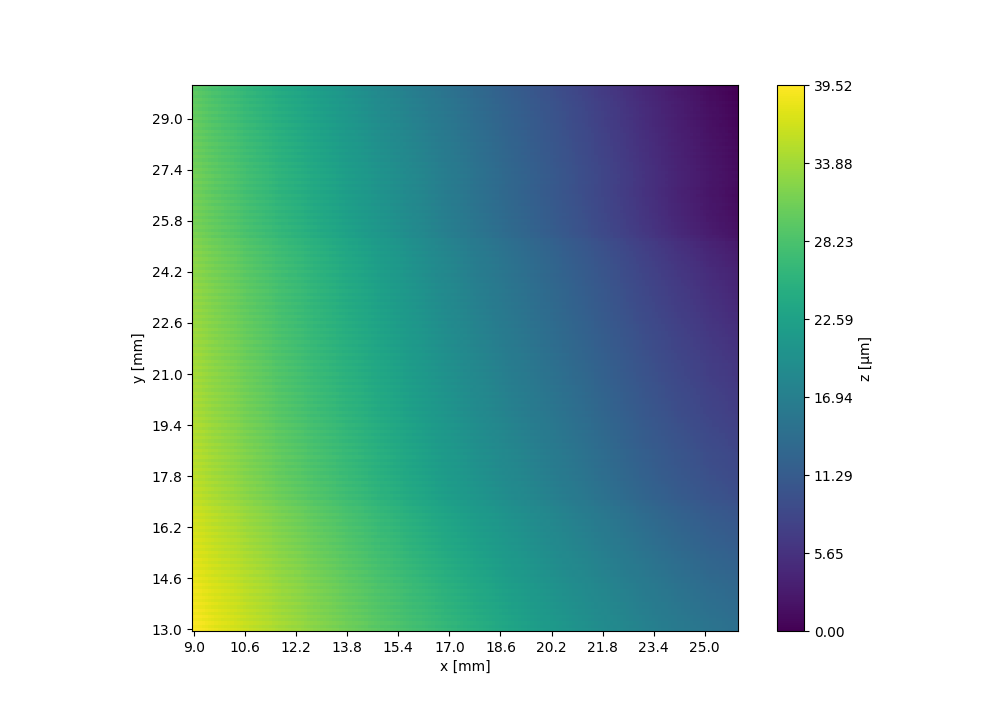

(<matplotlib.figure.Figure at 0x7f43e19dbeb8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f43e1a3a940>)

In [72]:
plot(x, y, background)

In [63]:
def logscale(x, a=1):
    return np.log(x - x.min() + 1) ** (1/a)

<IPython.core.display.Javascript object>


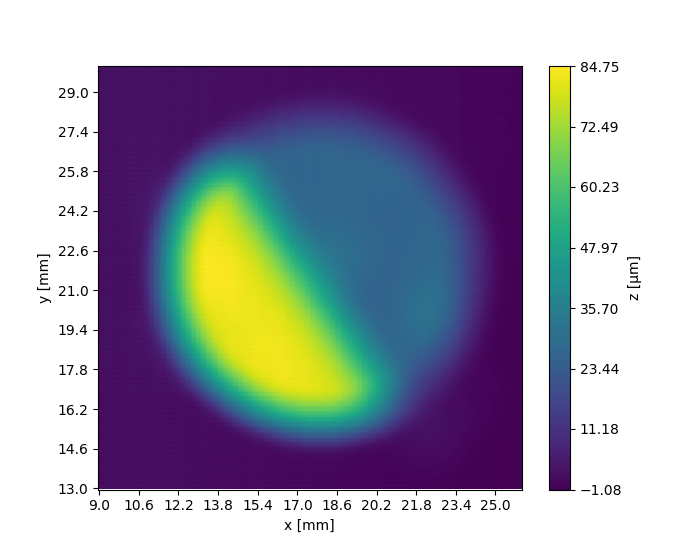

<IPython.core.display.Javascript object>


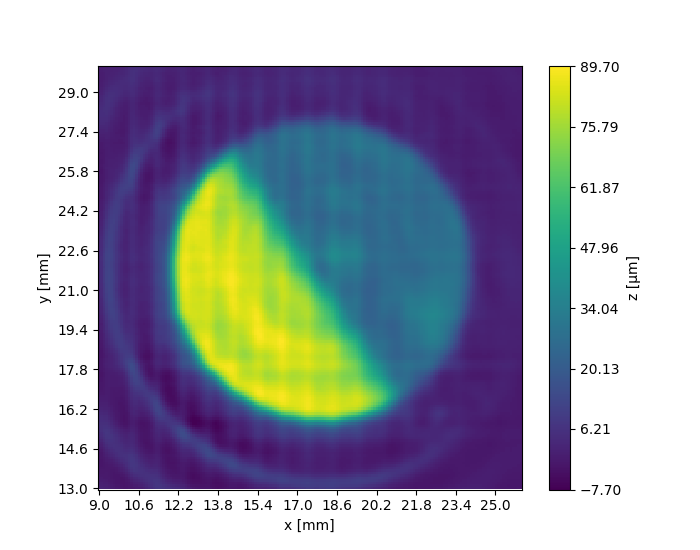

In [75]:
sensor = z[-1][0].max() - z[-1][0]
sensor1 = z[-1][0]
sensor2 = z[-2][0]
signal = sensor - background
noise = detrend2D(sensor1 - sensor2)
plot(x, y, signal)
noise = detrend2D(background)
#plot(x, y, noise)

diameter = 2.57
sigma = 0.5
stepsize = settings['extent'][0][2]

kernel = sensor_function(diameter / stepsize, sigma)
z_reconstructed = wiener(signal, kernel, 0.001, 1, extra=6)
fig, ax = plot(x, y, z_reconstructed)
profile = ProfileBuilder(fig, ax)

<IPython.core.display.Javascript object>


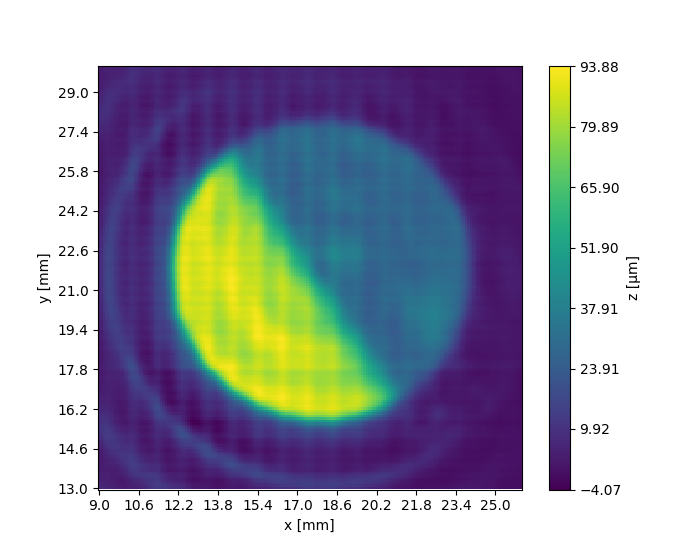

In [64]:
sensor = z[-1][0].max() - z[-1][0]
sensor1 = z[-1][0]
sensor2 = z[-2][0]
signal = sensor - background
noise = detrend2D(sensor1 - sensor2)
#plot(x, y, signal)
noise = detrend2D(background)
#plot(x, y, noise)

diameter = 2.57
sigma = 0.5
stepsize = settings['extent'][0][2]

kernel = sensor_function(diameter / stepsize, sigma)
z_reconstructed = wiener(signal, kernel, 0.001, 1, extra=6)
fig, ax = plot(x, y, z_reconstructed)
profile = ProfileBuilder(fig, ax)

<IPython.core.display.Javascript object>


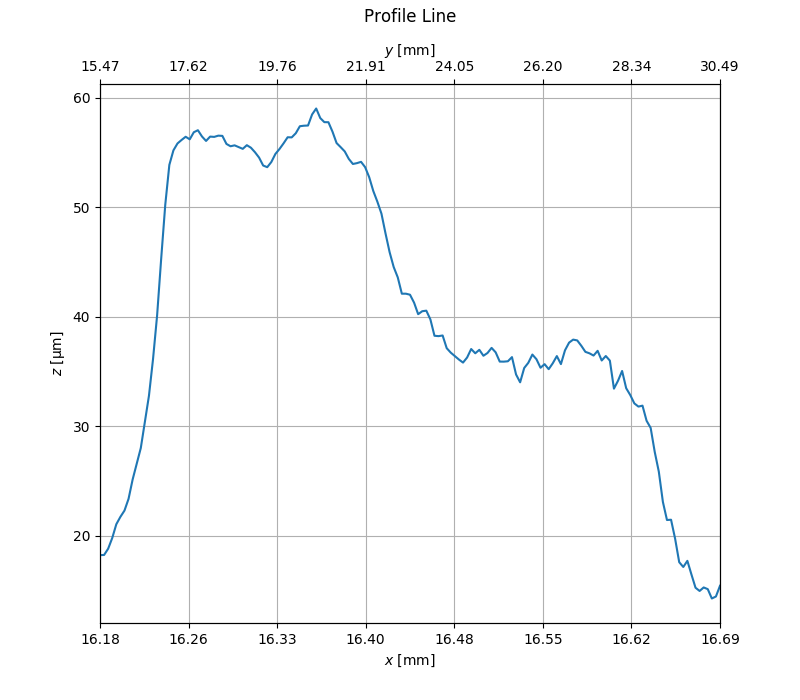

(<matplotlib.figure.Figure at 0x7feed6add3c8>,
 (<matplotlib.axes._subplots.AxesSubplot at 0x7feeda59a128>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7feed68a2160>))

In [14]:
plot_profile(x, y, z_reconstructed, *profile.coords)

In [29]:
noise.shape

(171, 171)